In [95]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

In [96]:
df = pd.read_csv("chodata.csv")

df.head()

,log_prec_y,Gene ID,description,sequence
0,0.485237,100682525,>NW_003613643.1:1643801-1638391 Tp53 [organism...,AAGCCTGGCTGACTTCTTGGGTGCTGCCATGGAGGAGCCACAGTCA...
1,0.258538,100682526,>NW_003619211.1:c16599-9011 Tuba1c [organism=C...,AGTCTATATAAGACCTCTCCTGGAGGCGGACTCACACTGCTTCTCC...
2,0.632336,100682527,NaN,NaN
3,0.993341,100682528,>NW_003614949.1:69399-49056 Tuba1b [organism=C...,CTGTATATAAGGAGCCGCATCCGCCCATGTGCCGCAGGTTCTCTTA...
4,0.541653,100682529,>NW_003614027.1:1194116-1180637 Mgat1 [organis...,TTGCAGGGGATATCTGTGGAAGGTGCCAGCATCTAGGTCTGGGTAG...


In [97]:
len(df)

11066

In [98]:
df = df.dropna()
len(df)

10794

In [99]:
df = df.sort_values("log_prec_y")

df.head()

,log_prec_y,Gene ID,description,sequence
10372,0.000000,100758887,>NW_003614925.1:c300354-287489 Serbp1 [organis...,GAATAAGGCGAGTTGGAAGAAGACCTGATCAACAACTTCAGGGTGA...
10330,0.005213,100762966,>NW_003615627.1:222049-172464 Bicd1 [organism=...,ATGCGTGAAGCAGAGGTAGGTGGATCTCCTTGAATTCAAGTCCAGC...
4919,0.005294,100774931,>NW_003616444.1:c75011-1257 Apba1 [organism=Cr...,CGTGGAGCAAAATGAGAGCGCAGTGAGCCAGCTCAGCCTCTCCCCA...
4471,0.006118,100763995,>NW_003614825.1:408124-232109 Katnip [organism...,AGGCGGGCTCAATGAACTAAGCTTCTTCGCCATTGGTCCGGAACCT...
2734,0.010475,100767978,>NW_003614410.1:c38225-33936 Stk16 [organism=C...,GCTCAGGCCCGAGCCTGATCAGTGAAGAGTCTTCTGTACTGGCAGA...


In [100]:
import math

def sigmoid_func(x):
    return 1/(1+math.pow(math.e, (-9*x+4.5)))

df["log_prec_y"] = df["log_prec_y"].apply(sigmoid_func)

<Axes: ylabel='log_prec_y'>

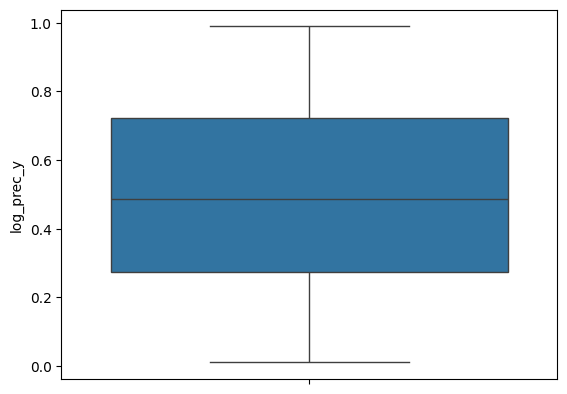

In [101]:
sns.boxplot(df["log_prec_y"])

In [103]:
df['class'] = pd.cut(df['log_prec_y'], 
                         bins=[0, 0.5, 1.0], 
                         labels=[0, 1], 
                         include_lowest=True)

In [104]:
df

,log_prec_y,Gene ID,description,sequence,class
10372,0.010987,100758887,>NW_003614925.1:c300354-287489 Serbp1 [organis...,GAATAAGGCGAGTTGGAAGAAGACCTGATCAACAACTTCAGGGTGA...,0
10330,0.011509,100762966,>NW_003615627.1:222049-172464 Bicd1 [organism=...,ATGCGTGAAGCAGAGGTAGGTGGATCTCCTTGAATTCAAGTCCAGC...,0
4919,0.011517,100774931,>NW_003616444.1:c75011-1257 Apba1 [organism=Cr...,CGTGGAGCAAAATGAGAGCGCAGTGAGCCAGCTCAGCCTCTCCCCA...,0
4471,0.011602,100763995,>NW_003614825.1:408124-232109 Katnip [organism...,AGGCGGGCTCAATGAACTAAGCTTCTTCGCCATTGGTCCGGAACCT...,0
2734,0.012060,100767978,>NW_003614410.1:c38225-33936 Stk16 [organism=C...,GCTCAGGCCCGAGCCTGATCAGTGAAGAGTCTTCTGTACTGGCAGA...,0
...,...,...,...,...,...
9290,0.988587,100757479,>NW_003613637.1:2982656-2979774 Rac3 [organism...,ATGGACCTCTGGGGGTGGTACTGGGTTGCCCCATTGCTACCAGGCA...,1
5580,0.988767,100770772,>NW_003613616.1:94456-59842 Epdr1 [organism=Cr...,GCAGAGAGCAGTGAAAACAAGCTTTAGTAAGCAACCGCCAGGGCAG...,1
5682,0.988841,100767928,>NW_003613681.1:1646374-1631251 Cltb [organism...,CTGGCTCTGAGGACATGGGGACTACAGTCAACGGAGATGTGTTTCA...,1
1444,0.988989,100757347,>NW_003614856.1:c51969-28232 Mfsd1 [organism=C...,GGTCACGTGAGCGCCGTGTCTCTGCAGCTCTGCCTTTGCTTCCTGC...,1


In [86]:
tenths = []

for i in range(10):
    tenth = df[(df["log_prec_y"]>=(i/10)) & (df["log_prec_y"]<((i+1)/10))]
    tenths.append(tenth)

In [87]:
for tenth in tenths:
    print(len(tenth))

679
1107
1227
1297
1270
1202
1087
1074
1040
811


In [37]:
scaled_tenths = []

for tenth in tenths:
    scaled_tenths.append(pd.concat([tenth]*(2945//len(tenth))))

In [39]:
for tenth in scaled_tenths: print(len(tenth))

2548
2380
2874
2269
2945
2207
2392
2682
2895
2883


In [41]:
df_smoke = pd.concat(scaled_tenths)

In [42]:
df_smoke

,index,gene,expression,description,sequence,cleaned_sequence
0,10385,100772380,0.000000,>NW_003614997.1:51658-43872 Gnat2 [organism=Cr...,TTCTCTGAGGAGACAACAGAGATGGGGAGTGGAATCAGTGCTGAGG...,ATGGGGAGTGGAATCAGTGCTGAGGACAAAGAACTTGCCAAGAGGT...
1,1591,103159486,0.000083,>NW_003613646.1:2369668-2349299 LOC103159486 [...,ATGAGGGAATGGCCTGGCTACCCAGTAGCCAAGAGGCTCCAGCTGA...,ATGAGGGAATGGCCTGGCTACCCAGTAGCCAAGAGGCTCCAGCTGA...
2,5087,103160349,0.000126,>NW_003613904.1:1115850-1115173 LOC103160349 [...,ATGAACGGGCAGTTCTCATCCCCAGTCAGCCCAGGTTCCGATTCTG...,ATGAACGGGCAGTTCTCATCCCCAGTCAGCCCAGGTTCCGATTCTG...
3,8747,100773247,0.000198,>NW_003614529.1:93937-87007 LOC100773247 [orga...,GGCCGGGACTGAGTGAGTGAATGAGGTGGAGCACGGGCGGCTTGGT...,ATGCCAGCGCCCGCCCGGGGCTGA
4,4181,103163815,0.000265,>NW_003613836.1:813123-795024 LOC103163815 [or...,TGGTGTGGGCTGTAATTAGGTCAGTGTAAGTTAAAGTAGGGCTGAG...,ATGAATAAAGTAGATTTTCTCCTCTGGAACACTCTGCAGTTTAATT...
...,...,...,...,...,...,...
13246,3585,100770904,0.990169,>NW_003613785.1:173760-171650 Tpt1 [organism=C...,ATGGTCAGTAGAACAGAAGGTAACATCGATGACTCGCTCATTGGTG...,ATGGTCAGTAGAACAGAAGGTAACATCGATGACTCGCTCATTGGTG...
13247,2918,100761146,0.990678,>NW_003613716.1:c2420208-2394950 Tpm4 [organis...,CACCCCACAGAAGCCATGGAGGCCATCAAGAAGAAGATGCAGATGC...,ATGGAGGCCATCAAGAAGAAGATGCAGATGCTGAAGCTGGACAAGG...
13248,12073,100753386,0.993168,>NW_003616312.1:c110484-106509 Rpl34 [organism...,TTCCCGCGCGTGGCGACAGAACCGCCGCCTACGGAAGCCGCCCTGC...,ATGGAGGGTGGGCTAGTTAGTGTCTAA
13249,4438,100765425,0.994058,>NW_003613854.1:c1384384-1383106 Rps27 [organi...,GAACGGCAAACCCGACCTTCCCAAGATGGCAGAACAACAAGGGCTC...,ATGTGA


In [21]:
df = df.reset_index()

In [22]:
li = [i * len(df)//10 for i in range(10)] + [len(df)]
li

[0, 1079, 2158, 3238, 4317, 5397, 6476, 7555, 8635, 9714, 10794]

In [23]:
deciles = [df.loc[li[i]:li[i+1]] for i in range(10)]

In [88]:
[len(tenth) for tenth in tenths]

[679, 1107, 1227, 1297, 1270, 1202, 1087, 1074, 1040, 811]

In [89]:
train_l = []
test_l = []
val_l = []

for decile in tenths:
    d_train, d_test = train_test_split(decile, test_size=0.2)
    d_test, d_val = train_test_split(d_test, test_size=0.5)
    
    train_l.append(d_train)
    test_l.append(d_test)
    val_l.append(d_val)

In [105]:
train, test = train_test_split(df, test_size=0.2)
test, val = train_test_split(test, test_size=0.5)

In [106]:
print(len(train))
print(len(test))
print(len(val))

8635
1079
1080


In [90]:
train = pd.concat(train_l)
test = pd.concat(test_l)
val = pd.concat(val_l)

<Axes: xlabel='log_prec_y', ylabel='Count'>

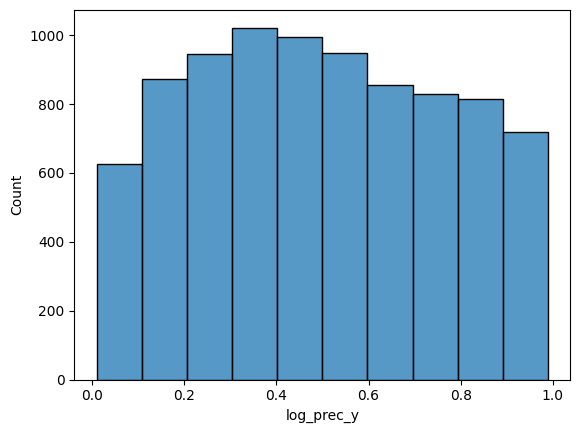

In [91]:
sns.histplot(train["log_prec_y"], bins=10)

In [92]:
print(len(train))
print(len(test))
print(len(val))

8631
1080
1083


In [13]:
def rebalance(df):
    tenths = []

    for i in range(10):
        tenth = df[(df["expression"]>=(i/10)) & (df["expression"]<((i+1)/10))]
        tenths.append(tenth)
    
    scaled_tenths = []
    
    max_len = max([len(tenth) for tenth in tenths])

    for tenth in tenths:
        scaled_tenths.append(pd.concat([tenth]*(max_len//len(tenth))))
        
    df_smoke = pd.concat(scaled_tenths)
    
    return df_smoke

In [14]:
train_rb = rebalance(train)
test_rb = rebalance(test)
val_rb = rebalance(val)

In [37]:
train

,level_0,index,log_prec_y,Gene ID,description,sequence
36,36,9183,0.070466,100764850,>NW_003613852.1:1327281-1268504 Cramp1 [organi...,AGCGGACGGCCGATGAGGAGTCACTGGACGGAGAGGGGCCCGGCGG...
16,16,3310,0.036231,103158597,>NW_003615935.1:110374-3130 Prdm2 [organism=Cr...,CTGTGTTGGGAACTCTGGTGGGAAAGGGTCACTCAAAGCAGTCGGC...
22,22,259,0.049983,100765509,>NW_003613715.1:c1343367-1334016 Cdc25b [organ...,ATGGAGGTGCACCCGCAGAAGTCTGCGCCGGGCTCTGCTCTCATTC...
15,15,9411,0.035439,100762658,>NW_003613786.1:c2117299-1960236 Cep112 [organ...,GTGACTTTATGGCAGAACTCCTGCTGGAGGTGAAGAAGGCAATTAT...
38,38,5245,0.072023,100769976,>NW_003614042.1:1220830-1196891 Synm [organism...,AACTCGCCAGCTAGAGCGCCAGTCTGAGGGCCTCCGAGGCAGCGGC...
...,...,...,...,...,...,...
10775,11047,10674,0.973481,100753142,>NW_003614508.1:c58432-57956 LOC100753142 [org...,CCTTGCAGCGGTGGCCCGAGTGCAGAGTCTGAGCTGCGGCGGCGCG...
10752,11024,4313,0.947246,100759203,>NW_003616508.1:83477-39182 Aco2 [organism=Cri...,GTTTCTTTCTCGCGCTGTGCCCGTCATGGAAGCCCCGCCCACTGCG...
10768,11040,654,0.959909,100764565,>NW_003614085.1:c724505-719884 Tmed4 [organism...,CCAGTGCGCAAGTGAGCGCATGCGCGGGCTTGAGGCGCGATGGCAG...
10730,11002,3133,0.932514,100766589,>NW_003613817.1:c1049655-958740 Kiaa0319l [org...,TCTTGCTTGTGGGCACTGCCCGAGTCTGGGGCCTCGGTGCTCGTGC...


In [15]:
len(test_rb)

2596

In [16]:
len(val_rb)

2598

In [17]:
len(train_rb)

20894

In [18]:
test_rb

,index,gene,expression,description,sequence,cleaned_sequence
211,5192,100753928,0.015433,>NW_003613912.1:1563404-1539447 CUNH11orf65 [o...,ATGCTTGGGGAATCGATCCAAGAATTTTCAGAGGAGGAGAGAGCTG...,ATGCTTGGGGAATCGATCCAAGAATTTTCAGAGGAGGAGAGAGCTG...
735,11556,100765767,0.055295,>NW_003615688.1:45185-44652 LOC100765767 [orga...,CACGCGGAGTCAACATGAGGACCGAGAAATGTTATTTCTGTTCCGG...,ATGAACCTGTGA
1169,1617,100769255,0.091149,>NW_003613647.1:c1358668-1291214 LOC100769255 ...,GGGTGGTGATGCTTTTGTGGTGCAGATGCTCCATTTTTATTGTTCC...,ATGGACAGAGGAGGTTACCAACTTCATGACCTGTTTCATAGACACA...
314,1954,100774450,0.022151,>NW_003613667.1:2334768-2317493 Tigit [organis...,ATCCTGTGTGTCACCAGATGCCCTTGAGTGCTTTTCACAAAAGCTG...,ATGGCTGGCTGTTCCTGA
701,4667,100752818,0.053189,>NW_003613867.1:1361585-1361323 LOC100752818 [...,CAGGAAGGAAGGAAGGACCCGGAGCAGAAGCACTGTATCCAGCACT...,ATGGCAGAAGTGAATTCCATGTTCCAGGAGGTCCTTCCAAAAAAAG...
...,...,...,...,...,...,...
13198,12748,100758533,0.940021,>NW_003617759.1:33796-30629 Rpl9 [organism=Cri...,TAGCCTTATCGTCGCGCGCTCATGACGCAACACGCAGGGCCCCTGA...,ATGACGCAACACGCAGGGCCCCTGACGGAATACAAGAACGTGATGA...
13250,8961,100773922,0.995767,>NW_003614570.1:646127-643945 Rps11 [organism=...,AGTCCCGAGATCGCGTGCTCTGAGCCGGAAGTACCTCCTAAACCGT...,ATGACTCGGTGGCTCAGACAGGGCTAG
13187,10753,100765281,0.927609,>NW_003615164.1:113043-88694 Calm2 [organism=C...,ATGGTTCAGGAGCTGGATGGGGAGGGGGATGCCCATGGTCTCCCCA...,ATGGTTCAGGAGCTGGATGGGGAGGGGGATGCCCATGGTCTCCCCA...
13224,12919,100768693,0.972346,>NW_003619313.1:c8662-2101 LOC100768693 [organ...,TGGGGCGGGGGCGGGGTCTACCGGGGCCGCAGCCTGGGAGGCTTTA...,ATGGACAGCCTGGGGACCACAGCATCTGCAACCCCTTCTGGGGACC...


In [107]:
train.to_csv("cho_train_cls.csv")
test.to_csv("cho_test_cls.csv")
val.to_csv("cho_val_cls.csv")

In [94]:
train

,log_prec_y,Gene ID,description,sequence
9579,0.096704,100759277,>NW_003613601.1:176816-170713 Ift20 [organism=...,GGCAGTTGCCGCTCCTCCCGGGTTGCCTCTATTTCCCAGCAGGCAC...
6987,0.076013,100769743,>NW_003613697.1:2033635-1876579 Clasp2 [organi...,CATTAAATCTCTTTCTGCTTGCAGGTATCATTATTAGGATTGGAGA...
10504,0.087893,100765362,>NW_003614617.1:299782-294362 Kptn [organism=C...,TCCAGGTTGGAGACCAGCTGGAGACCGTCTTTCTCCTGAGTGGGAA...
6498,0.075264,100756483,>NW_003615375.1:c188654-28452 Fgd4 [organism=C...,CGGCGGAAGTCAGGCGCCTACCTGCCTCCCGGGATCCCGCGGCCCT...
6419,0.061699,100766911,>NW_003614504.1:588833-545681 Tbccd1 [organism...,AAATCTCAGGCGGAGGGGAGCGCGCTGCGAGGAAACCCGAGTGGTC...
...,...,...,...,...
8238,0.906142,100768569,>NW_003614984.1:101148-92567 Tbc1d17 [organism...,CAGATAGATGGTTTCCCCCATTGCAGCTCTACAGCTTTGGGGGCGC...
4570,0.982183,100752366,>NW_003613580.1:8264530-8255374 Idi1 [organism...,CGTGCCGAAGGTCCCAACTGTGCACTGGGAGTCGCCAACACCCTCG...
226,0.987085,100689405,>NW_003613902.1:487928-467258 Hspa9 [organism=...,CCCCCCGCGCCCCCCGCCCCCCCCCACTCCCAGGTGAGGAACTGCC...
5527,0.956481,100756884,>NW_003616060.1:c75880-51262 Mki67 [organism=C...,GAGTATTGAATGTGACATTCGTATCCAACTGCCTGTAGTGTCCAAA...


In [1]:
train_rb

NameError: name 'train_rb' is not defined

In [54]:
test

,level_0,index,gene,expression,description,sequence,cleaned_sequence
1705,431,12359,103164511,0.031363,>NW_003616736.1:c53680-51946 LOC103164511 [org...,ATGAAGAATGGAACAGTCATTCTTTCTGTGCTCAAGTTTTCAGTAG...,ATGAAGAATGGAACAGTCATTCTTTCTGTGCTCAAGTTTTCAGTAG...
1511,237,10164,100760625,0.017872,>NW_003614910.1:254338-253691 LOC100760625 [or...,TAAACATGGGCAAAGGAGATCCTAAGAAGCCGAGAGGCAAAATGTC...,ATGCATTTTTGTGCAAACTTGCCGAGAGGAACACAAGAAGAAGCAC...
0,0,10385,100772380,0.000000,>NW_003614997.1:51658-43872 Gnat2 [organism=Cr...,TTCTCTGAGGAGACAACAGAGATGGGGAGTGGAATCAGTGCTGAGG...,ATGGGGAGTGGAATCAGTGCTGAGGACAAAGAACTTGCCAAGAGGT...
1599,325,5758,103159177,0.023478,>NW_003613983.1:1129875-1122876 LOC103159177 [...,TTGCTTCTTGCTGTAGAGGCTGCTGCCACCGGCTGGCTAGGTCGCT...,ATGCTGCAAACCACTTTCCATTTCTGA
1668,394,9653,100774031,0.028359,>NW_003614763.1:65139-45859 Lrrc56 [organism=C...,GTCCCGGCAACCGTTGCTAGGGGGCGGGGCTCATCCTGCCGCAGCC...,ATGGCGCCAGGGCCGCAACCCCACCGCGGAGGAAAAAATAAAAAAA...
...,...,...,...,...,...,...,...
23882,13197,648,100756201,0.937384,>NW_003613605.1:c4499601-4494860 Rplp0 [organi...,ACCCAATGGCTGCCTACATTGATTTGGTGAGGCGGGACGGTTGATG...,ATGTCGTCATCGGATAACCAGGCCGCCCATATAAAAGGCGCACGCG...
23642,13236,3141,100756818,0.982049,>NW_003613745.1:c1605195-1601663 Rpl23 [organi...,CGCCACTGGGTGGGGGGAGAGGTGTGGAGAGGTCCGGTCACGTGGC...,ATGGAGATTCCAGTCCCCGTATCCTGGACGGAAGGACGGTAA
25040,13239,2063,100689409,0.985325,>NW_003613677.1:c181541-176718 B2m [organism=C...,GCTCTGAGCAGCGCCCACGATGGCTCGCTCCGTGGCCGTGGTCTTT...,ATGCGGCCGGTTTCCGACTGTGAGTTGAGACAGGGAACACTTCTCT...
24456,13213,4477,100754509,0.957920,>NW_003613855.1:c1367744-1363397 Hsp90ab1 [org...,TTAGTAATTAATGTGTAATGCTTTCTTAGATGCCTGAGGAGGTGCA...,ATGGCGAGGAAGAGGTGGAGACCTTTGCCTTCCAGGCAGAAATCGC...


In [55]:
val

,level_0,index,gene,expression,description,sequence,cleaned_sequence
1808,534,10157,103160567,0.038734,>NW_003614906.1:70923-63826 LOC103160567 [orga...,ATCAGCATTTTCCTCCCCTAACTGTGACCATTGTTCCCAGTCTTGT...,ATGAGCTTCCATGTGGATAGATTCAGTAGTGCTTCGAAGAAAATCC...
58,58,1405,100760954,0.004454,>NW_003613640.1:1885877-1881802 LOC100760954 [...,GAGACCCACCTGTCTCTGCTTCCTCAGTTCTGGAATTAAAGGTGTG...,ATGCCACCATGCCTGGAGAGCTTCCATTTTAAGGTAAGGAGACTGA...
1210,1210,716,100750531,0.095070,>NW_003613610.1:c3195914-3080388 Vwf [organism...,GGCACTGAGCTCCAGCTCCAAGAGGAGTGTACTTTGTGCAGAAGTC...,ATGTTTGTCCTTGACGGGCTGAACCCTTGA
2543,1269,2845,100773497,0.099638,>NW_003613716.1:c1238169-1226527 Jak3 [organis...,TTAATTTTCTTTATTAGAGACAGGGTCTCTCTGTGAAGCACTGGCT...,ATGCCTGCTTTTGTTGTTTTATTATGGGAGGATACACATGCAGCTC...
1922,648,6597,100752745,0.048537,>NW_003614105.1:c386726-368792 Cnr2 [organism=...,GTGACTTCCTGCTGCCTCTGAATCAACATGTAGGACTCTCGGCTCC...,ATGTAG
...,...,...,...,...,...,...,...
24555,13219,2994,100774375,0.961309,>NW_003613730.1:c2303854-2297591 Ppib [organis...,GTGTTCACACCCTCTTCCGGTCCGGGCTCCCGCGACCGCTTCTCCT...,ATGACCTCTTGGAACCAGGCTCGCCCTACCCAGCCCCCGCTCCCCC...
24001,13223,7364,100689052,0.970561,>NW_003614217.1:c553206-550097 Myl6 [organism=...,GGGCCCCGACTAGCATCCCTATTGGACGGAGCGGCAGACGGTGACG...,ATGACCCTAGAGTCCCCAGCCGCCGCTCCTACTTCCTTATATGGAC...
24923,13215,565,100763833,0.958302,>NW_003613601.1:3689444-3687605 LOC100763833 [...,GAGCTGCCAGAAGAGCAGAGAGACTGAGGCCAACCCAGACCTGCCT...,ATGTGCTGGCCCAGCCAGGTGAGACCCCAGCTTCCTTCTCCTCACA...
23695,13196,11504,100689327,0.937136,>NW_003615623.1:c82307-74491 Serpinh1 [organis...,GCTCTCCGGAAGCGTTTCCAACTTTCCAGAAGTTTCTTAGGACAAG...,ATGAAAAAGGCAGGCAGTGATCTCCCTCTGAGGCAGTTTCAAGGTA...


(array([30., 27., 27., 28., 30., 30., 11., 21., 29., 21., 35., 25., 27.,
        31., 16., 21., 23., 22., 17., 24., 27., 16., 19., 29., 30., 22.,
        25., 34., 30., 52., 15., 13., 22., 34., 26., 23., 22., 17., 27.,
        33., 23., 28., 36., 23., 23., 28., 35., 31., 23., 29., 36., 26.,
        27., 25., 22., 21., 25., 14., 12., 25., 28., 21., 32., 24., 27.,
        20., 25., 14., 26., 18., 20., 38., 38., 32., 37., 29., 21., 19.,
        28., 11., 41., 27., 28., 35., 36., 29., 23., 21., 28., 15., 40.,
        24., 34., 31., 19., 38., 32., 25., 20., 33.]),
 array([4.33945585e-04, 1.03872729e-02, 2.03406002e-02, 3.02939276e-02,
        4.02472549e-02, 5.02005822e-02, 6.01539096e-02, 7.01072369e-02,
        8.00605642e-02, 9.00138915e-02, 9.99672189e-02, 1.09920546e-01,
        1.19873874e-01, 1.29827201e-01, 1.39780528e-01, 1.49733856e-01,
        1.59687183e-01, 1.69640510e-01, 1.79593837e-01, 1.89547165e-01,
        1.99500492e-01, 2.09453819e-01, 2.19407147e-01, 2.29360474e-01,
  

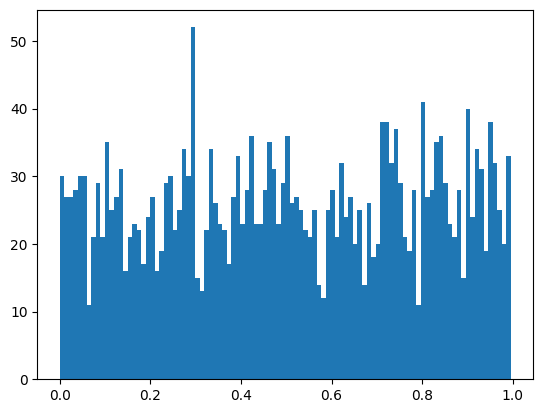

In [56]:
import matplotlib.pyplot as plt

plt.hist(val["expression"], bins=100)

In [57]:
train.to_csv("train_smoke.csv")
test.to_csv("test_smoke.csv")
val.to_csv("val_smoke.csv")

In [2]:
import pandas as pd
train = pd.read_csv("train.csv")

In [3]:
train.head()

,Unnamed: 0,index,gene,expression,description,sequence,cleaned_sequence
0,953,133,103161373,0.074376,>NW_003613583.1:2487957-2466471 LOC103161373 [...,TGCAGCCACTGCCCCGGCCGAGCGCGGGCGGAAAACGAAACCGCAG...,ATGGCAAAGTCCCGGGCAGGAAGTTTACAAGGCTCAACGTAA
1,631,8474,100767300,0.047194,>NW_003614457.1:481247-478976 LOC100767300 [or...,ATGGGGCAGACTCAGGTGGTTCAGGAACTGGGAGTAGTGAAAAGTG...,ATGGGGCAGACTCAGGTGGTTCAGGAACTGGGAGTAGTGAAAAGTG...
2,1056,7557,100765254,0.081416,>NW_003614244.1:c830756-830308 LOC100765254 [o...,ATGCTGTGTGGAAGCCGAAGCCACTCTTCCTGGGTGGCCCCTCCGG...,ATGCTGTGTGGAAGCCGAAGCCACTCTTCCTGGGTGGCCCCTCCGG...
3,823,6498,100769774,0.063045,>NW_003614085.1:c1061110-1053520 Nacad [organi...,CATCCACGCCCCCCCCCATCAGAGGGGCGGTGGCCGAGCTGGCTAC...,ATGAAAGCCTGGAGGCAGCAGACAGCATCCTCCAAAGCCTGCAGCT...
4,148,4626,103161433,0.010699,>NW_003613865.1:c345643-334084 LOC103161433 [o...,CGAGGGGCGGGATCCCAAAGTTCAATAAGGAATCCTGGGGCCAGAC...,ATGCGCGGCTCTCCTACTTGCTGA


In [4]:
sequences = train["sequence"]

In [5]:
sequences

0        TGCAGCCACTGCCCCGGCCGAGCGCGGGCGGAAAACGAAACCGCAG...
1        ATGGGGCAGACTCAGGTGGTTCAGGAACTGGGAGTAGTGAAAAGTG...
2        ATGCTGTGTGGAAGCCGAAGCCACTCTTCCTGGGTGGCCCCTCCGG...
3        CATCCACGCCCCCCCCCATCAGAGGGGCGGTGGCCGAGCTGGCTAC...
4        CGAGGGGCGGGATCCCAAAGTTCAATAAGGAATCCTGGGGCCAGAC...
                               ...                        
10596    GGGCGTGGGGGTTGGCCGGGTTTGGTGTGCGCCTGCGCCGATCGCC...
10597    CGCCGGAAGTCCTCAGCGCGGCGCGTGCGTGGATAGAGCAGAAGGG...
10598    CCGAGGCCCCGCTCCCAGGGAACACTAGTAGTTCCGGGTTGCCCGC...
10599    GGCAGTGCCATGTGGAGAGGAAGCAGCTCCTTCACCAGCTTGGTGG...
10600    ATTTTCAGCAGACAAAGCATCTTTTGTCTTATGAAATTACAACTCC...
Name: sequence, Length: 10601, dtype: object

In [7]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("../dnabert2", trust_remote_code=True)

TGCAGCCACTGCCCCGGCCGAGCGCGGGCGGAAAACGAAACCGCAGGCCGCTTCGCGGGCGCTTTGTCTCCGGCGCTGCAAGCGGGACCCGGCGAGTGGCTTCAGTTCTGGCAGCGCCACGAACCGCACAAGTTCCCTAGTAGGACGGCTGGTTCACTCATTCAGAAAGGCGCACCCACACGCGTGCATTAACACACGCTCGGAGCGCACACGCACTGATGCCCAAGCGAATCCCCGAATCACCAACTCAGACGTACGAACTTGCACCCAGTGCGCGCCCCACTCACGTACCCCAGGTTCCCACGGGAGCTGCCATTGCGATCGCCCTCATTCACACACACGCCACTCTCAGATCTGAACTAAAACAGCAAAGTCTCCTTAGAGCCCCCTCCCCCCACTCTCAACTCTGAAATCCTTTTTTTTGGCCCCGCGGCCCCGAGTCCCCTTTTACAAGCGCAGGTTCTGATTTCCTGAGAGATGGCAAAGTCCCGGGCAGGAAGTTTACAAGGCTCAACGTAAACACGTTCCGGGGGATCCTTTAATAATAAGAGTAGGGAAGCCTGCCGGCGCGGGGGGAGTTGGCCTGATGCCCCTATGGGCTCGGCCTGCCGCCGCCGCGGGGCCTCCCGACACTGCGCGCCAGGCCGGGTTCCGGAAAGCGGGCGGCGCTGGCGGGGAGAGCGGCAGGGAGCGGCCCTGACTGCGGGGTCGCGGCCGTGGAAAGCTGGTGCGTGATGCAGCACCGTGCGCGAGATCCAGCTAGACTCTGCGCGCCCGAAACCAGGTGAGTGCGGGCCTCCTGCCGCACAGACGCACAGACGTGCACGCAGGCCCTGCTGGCGGGGAGGGTGATGAAGGATGTTTTCGCTTGTCAGTGAGAGGCACACAGGAGTCAGGCTGCTGCGCCCTGGCGCGAGCTGCAGGGAGAGGTGTGTGTGGGTCTACTTCAAAGCCTGCCGGCCTCAAGTTTCTTTGGATTCCTGGTTCCCCATCTTCTCCC

In [11]:
li = []

for seq in sequences:
    try:
        tokens = tokenizer(seq)
        li.append(tokens)
    except: 
        continue
    

In [12]:
# warmup, cosine, depth

In [16]:
lens = [len(item["input_ids"]) for item in li]

In [17]:
max(lens)

212862